X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


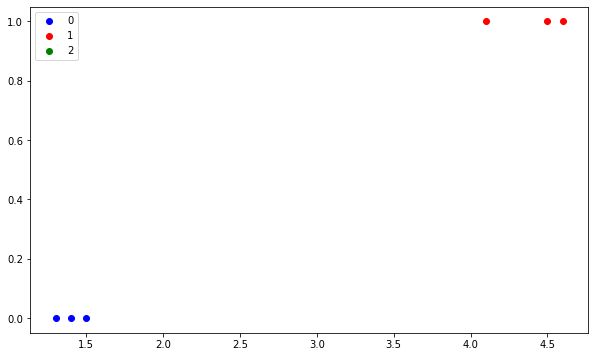

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.scatter(X[y == 2][:, 0], y[y == 2], color='g', label='2')
plt.legend()
plt.show()

In [5]:
N = 6 # numbers of samples
k = 2 # number of classes

# one_hot
import numpy as np

def convert_one_hot(y, k):  
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print('y_one_hot\n', y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print('X\n', X)

y_one_hot
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
X
 [[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [12]:
# initialize parameters
theta = np.array([[0.1, 0.05], 
                  [0.2, -0.1]])
print('theta:\n', theta)

theta:
 [[ 0.1   0.05]
 [ 0.2  -0.1 ]]


In [13]:
# some parameters
learning_rate = 0.1
losses = []
num_iter = 100

for epoch in range(num_iter):
    for i in range(N): 
        xi = X[i]
        yi = y_one_hot[i]
        
        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))
        
        # compute z
        z = theta.T.dot(xi)        
                
        # compute y_hat
        exp_z = np.exp(z)
        y_hat = exp_z / np.sum(exp_z, axis=0)
        
        # compute the loss
        loss = -np.log(yi.T.dot(y_hat))
        losses.append(loss[0])
        
        # compute the gradient dz
        dz = y_hat - yi
        
        # compute dtheta
        dtheta = xi.dot(dz.T)
        
        # update
        theta = theta - learning_rate*dtheta  

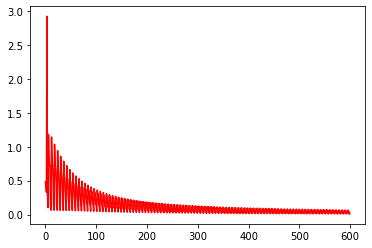

In [14]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [15]:
print(theta)

[[ 3.13085488 -2.98085488]
 [-1.11662847  1.21662847]]


In [16]:
i = 0
xi = X[i]
yi = y_one_hot[i]

xi = xi.reshape((2,1))
yi = yi.reshape((2,1))

print(xi)
print(yi)

[[1. ]
 [1.4]]
[[1.]
 [0.]]


In [17]:
z = theta.T.dot(xi)
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=0)
print(y_hat)

[[0.94506744]
 [0.05493256]]


In [18]:
predicted_class = np.argmax(y_hat, axis=0)
print(predicted_class)

[0]


In [ ]:
# some parameters
learning_rate = 0.1
losses = []
num_iter = 1

for epoch in range(num_iter):
    for i in range(N): 
        xi = X[i]
        yi = y_one_hot[i]
        
        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))
        print('xi: ', xi)
        print('yi:\n', yi)
        
        # evaluate class scores
        z = theta.T.dot(xi)
        print('Z: ', z)        
                  
        #compute the class probabilities
        exp_z = np.exp(z)
        y_hat = exp_z / np.sum(exp_z, axis=0)
        print('y_hat: ', y_hat)
        print('y_hat shape: ', y_hat.shape)
        
        # compute the loss
        loss = -np.log(yi.T.dot(y_hat))
        print('loss: ', loss)
           
        # compute the gradient on scores
        dz = y_hat - yi
        print('dz:\n', dz)
         
        # backpropate the gradient to the parameters (W,b)
        dtheta = xi.dot(dz.T)
        print('dtheta:\n', dtheta)
        
        # perform a parameter update
        theta = theta - learning_rate*dtheta        
        print('theta:\n', theta)
                
        break